## 1. Importar Bibliotecas Necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

print(F"✅ Versión instalada de Pandas = {pd.__version__}")
print(F"✅ Versión instalada de Numpy = {np.__version__}")
print(F"✅ Versión instalada de Matplotlib = {plt.matplotlib.__version__}")
print(F"✅ Versión instalada de Seaborn = {seaborn.__version__}")


# Configuración para gráficos
plt.style.use('default')
sns.set_palette("husl")

✅ Versión instalada de Pandas = 2.2.2
✅ Versión instalada de Numpy = 1.26.4
✅ Versión instalada de Matplotlib = 3.9.2
✅ Versión instalada de Seaborn = 0.13.2


## 2. ¿Qué es un Outlier?


In [2]:
print("Un outlier es un valor que se aleja significativamente del resto de los datos.")
print("Puede deberse a:")
print("- Errores en la medición o entrada de datos")
print("- Eventos inusuales pero válidos")
print("- Variabilidad natural extrema")

Un outlier es un valor que se aleja significativamente del resto de los datos.
Puede deberse a:
- Errores en la medición o entrada de datos
- Eventos inusuales pero válidos
- Variabilidad natural extrema


## 3. Creación de Datos con Outliers


In [3]:
# Crear datos con outliers para demostración
# np.random.normal() - Genera números siguiendo una distribución normal (campana de Gauss). Trabaja con valores continuos siguiendo una distribución normal.
np.random.seed(42)
datos_normales = np.random.normal(50, 10, 100)  # Media=50, std=10
outliers = [120, 150, -20]  # Valores atípicos
datos_con_outliers = np.concatenate([datos_normales, outliers])

df_outliers = pd.DataFrame({'Valores': datos_con_outliers})
print(f"Estadísticas descriptivas:")
print(df_outliers.describe())

Estadísticas descriptivas:
          Valores
count  103.000000
mean    49.962655
std     16.589897
min    -20.000000
25%     43.988273
50%     48.843517
75%     55.049908
max    150.000000


## 4. Detección de Outliers con IQR


In [4]:
# Calcular cuartiles
Q1 = df_outliers['Valores'].quantile(0.25)
Q3 = df_outliers['Valores'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

# Establecer límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite inferior: {limite_inferior:.2f}")
print(f"Límite superior: {limite_superior:.2f}")

# Filtrar outliers
outliers_iqr = df_outliers[(df_outliers['Valores'] < limite_inferior) |
                          (df_outliers['Valores'] > limite_superior)]
datos_filtrados_iqr = df_outliers[(df_outliers['Valores'] >= limite_inferior) &
                                 (df_outliers['Valores'] <= limite_superior)]

print(f"\nOutliers detectados con IQR: {len(outliers_iqr)}")
print(f"Valores outliers: {outliers_iqr['Valores'].tolist()}")

Q1: 43.99
Q3: 55.05
IQR: 11.06
Límite inferior: 27.40
Límite superior: 71.64

Outliers detectados con IQR: 4
Valores outliers: [23.802548959102555, 120.0, 150.0, -20.0]


## 5. Detección de Outliers con Z-Score


In [5]:
# Calcular Z-scores
z_scores = np.abs(stats.zscore(df_outliers['Valores']))
df_outliers['Z_Score'] = z_scores

print("Primeros 10 valores con sus Z-scores:")
print(df_outliers.head(10))

# Detectar outliers (|Z| > 3)
outliers_zscore = df_outliers[z_scores > 3]
datos_filtrados_zscore = df_outliers[z_scores <= 3]

print(f"\nOutliers detectados con Z-score (>3): {len(outliers_zscore)}")
if len(outliers_zscore) > 0:
    print(f"Valores outliers: {outliers_zscore['Valores'].tolist()}")

Primeros 10 valores con sus Z-scores:
     Valores   Z_Score
0  54.967142  0.303134
1  48.617357  0.081488
2  56.476885  0.394583
3  65.230299  0.924798
4  47.658466  0.139570
5  47.658630  0.139560
6  65.792128  0.958829
7  57.674347  0.467116
8  45.305256  0.282110
9  55.425600  0.330904

Outliers detectados con Z-score (>3): 3
Valores outliers: [120.0, 150.0, -20.0]


## 6. Visualización de Outliers


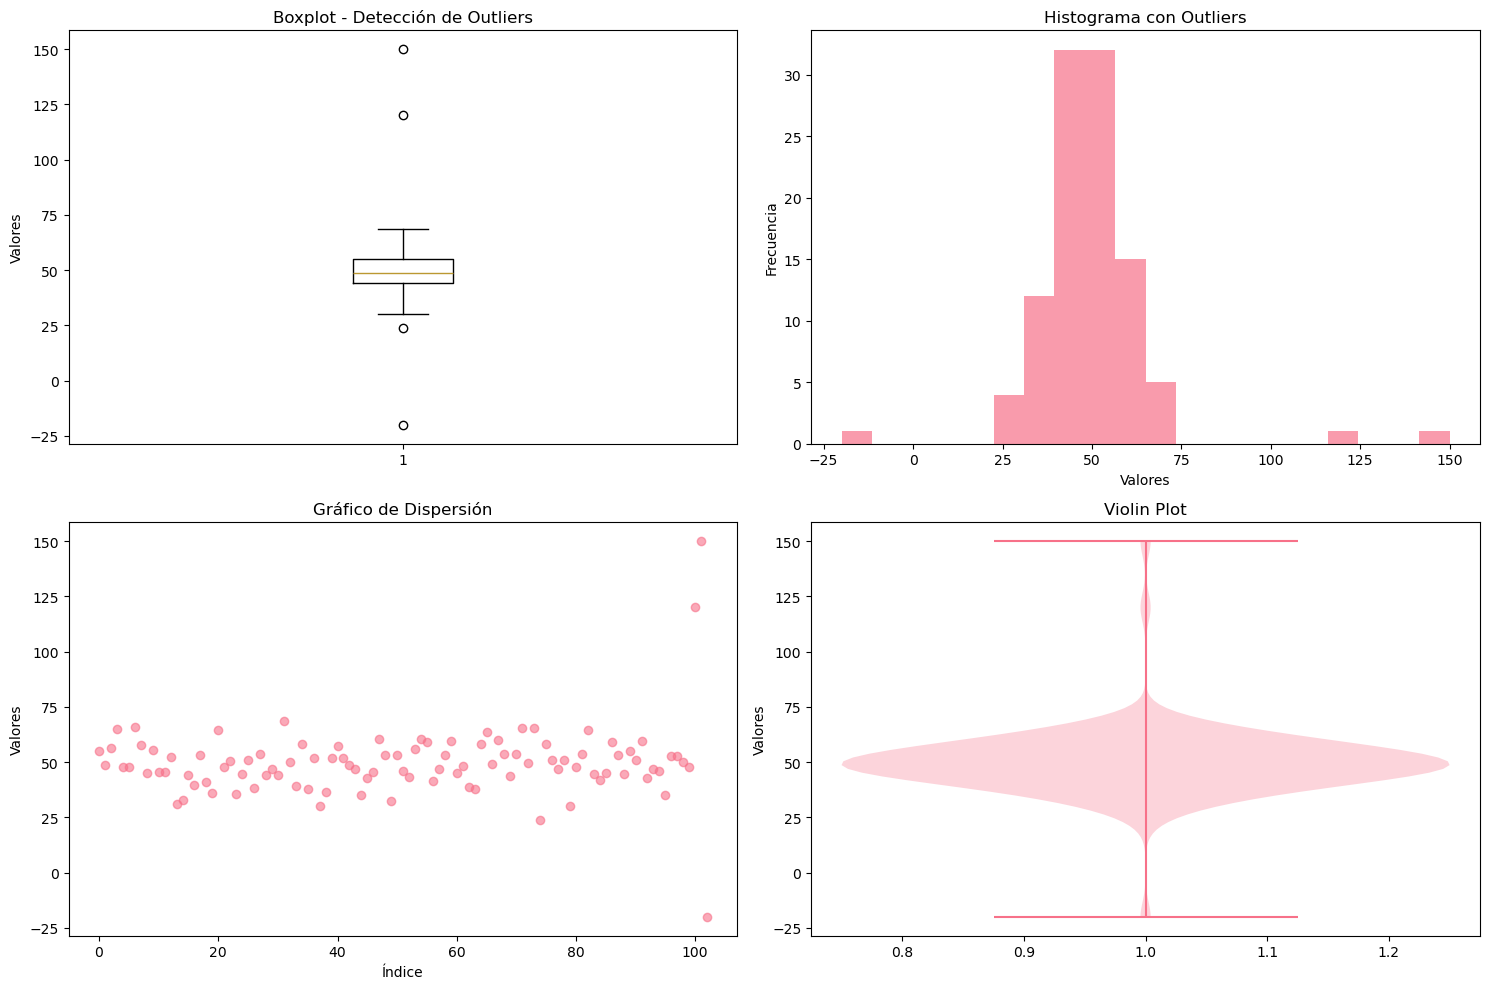

In [6]:
# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Boxplot
axes[0,0].boxplot(df_outliers['Valores'])
axes[0,0].set_title('Boxplot - Detección de Outliers')
axes[0,0].set_ylabel('Valores')

# Histograma
axes[0,1].hist(df_outliers['Valores'], bins=20, alpha=0.7)
axes[0,1].set_title('Histograma con Outliers')
axes[0,1].set_xlabel('Valores')
axes[0,1].set_ylabel('Frecuencia')

# Gráfico de dispersión con índices
axes[1,0].scatter(range(len(df_outliers)), df_outliers['Valores'], alpha=0.6)
axes[1,0].set_title('Gráfico de Dispersión')
axes[1,0].set_xlabel('Índice')
axes[1,0].set_ylabel('Valores')

# Violin plot
axes[1,1].violinplot(df_outliers['Valores'], positions=[1])
axes[1,1].set_title('Violin Plot')
axes[1,1].set_ylabel('Valores')

plt.tight_layout()
plt.show()

## 7. Eliminación de Outliers


In [7]:
print("Datos originales:")
print(f"Cantidad de registros: {len(df_outliers)}")
print(f"Media: {df_outliers['Valores'].mean():.2f}")
print(f"Desviación estándar: {df_outliers['Valores'].std():.2f}")

print(f"\nDatos después de eliminar outliers (IQR):")
print(f"Cantidad de registros: {len(datos_filtrados_iqr)}")
print(f"Media: {datos_filtrados_iqr['Valores'].mean():.2f}")
print(f"Desviación estándar: {datos_filtrados_iqr['Valores'].std():.2f}")

print(f"\nRegistros eliminados: {len(df_outliers) - len(datos_filtrados_iqr)}")

Datos originales:
Cantidad de registros: 103
Media: 49.96
Desviación estándar: 16.59

Datos después de eliminar outliers (IQR):
Cantidad de registros: 99
Media: 49.22
Desviación estándar: 8.76

Registros eliminados: 4


## 8. Ejemplo Completo


In [8]:
# Recrear el ejemplo específico del PDF
df_ejemplo = pd.DataFrame({'Valores': [10, 12, 15, 18, 20, 22, 25, 28, 30, 120, 300]})

print("Datos originales:")
print(f"Valores: {df_ejemplo['Valores'].tolist()}")

Datos originales:
Valores: [10, 12, 15, 18, 20, 22, 25, 28, 30, 120, 300]


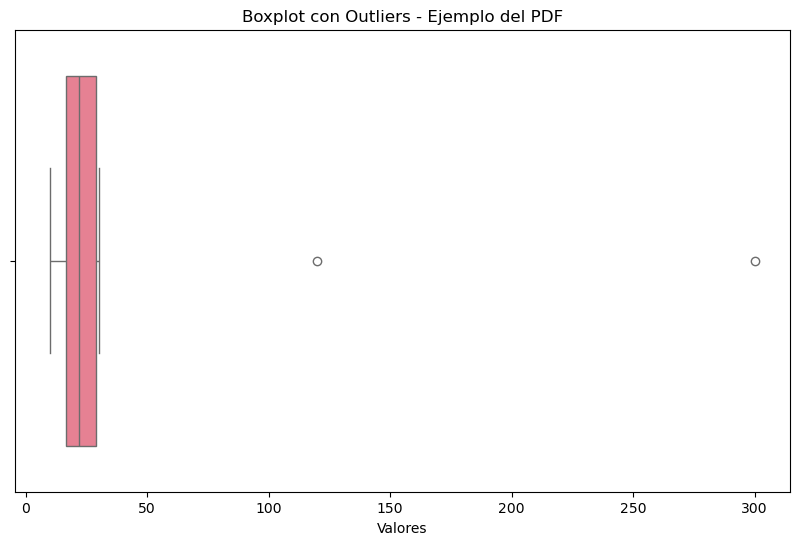

In [9]:
# Visualizar distribución inicial
plt.figure(figsize=(10, 6))
sns.boxplot(x='Valores', data=df_ejemplo)
plt.title('Boxplot con Outliers - Ejemplo del PDF')
plt.show()

In [10]:
# Detectar outliers con IQR
Q1 = df_ejemplo['Valores'].quantile(0.25)
Q3 = df_ejemplo['Valores'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"\nDetección con IQR:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Límites: [{limite_inferior:.1f}, {limite_superior:.1f}]")


Detección con IQR:
Q1: 16.5, Q3: 29.0, IQR: 12.5
Límites: [-2.2, 47.8]


In [11]:
# Filtrar y comparar resultados
df_filtrado = df_ejemplo[(df_ejemplo['Valores'] >= limite_inferior) &
                        (df_ejemplo['Valores'] <= limite_superior)]

print(f"\nResultados:")
print(f"Datos originales: {df_ejemplo['Valores'].tolist()}")
print(f"Datos sin outliers: {df_filtrado['Valores'].tolist()}")


Resultados:
Datos originales: [10, 12, 15, 18, 20, 22, 25, 28, 30, 120, 300]
Datos sin outliers: [10, 12, 15, 18, 20, 22, 25, 28, 30]
